## Necessary libraries

In [4]:
import numpy as np

## Python function to find integration

In [71]:
def py_trapz(f, a, b, n):
    dx=(b-a)/n #defining the infinitesmall length
    int_f=0
    for i in range(int(n)):
        s=(f(a+i*dx)+f(a+(i+1)*dx))
        int_f+=(s*dx)/2
    return(int_f)


### Testing the speed of the simple python functions

In [72]:
def f(x):
    return(x**2)

%timeit py_trapz(f,0,10,1e7)
print(f"The integration result is {py_trapz(f,0,10,1e7)}")

4.01 s ± 73.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The integration result is 333.3333333333152


In [10]:
import math
def f(x):
    return(math.sin(x))

%timeit py_trapz(f,0,math.pi,1e7)
print(f"The integration result is {py_trapz(f,0,math.pi,1e7)}")

The integration result is 2.000000000000048


In [11]:
import math
def f(x):
    return(math.exp(x))

%timeit py_trapz(f,0,1,1e7)
print(f"The integration result is {py_trapz(f,0,1,1e7)}")

The integration result is 1.7182818284590207


In [12]:
import math
def f(x):
    return(1/x)

# %timeit py_trapz(f,1,2,1e7)
print(f"The integration result is {py_trapz(f,1,2,1e7)}")

The integration result is 0.6931471805600876


### Testing the efficiency of numpy functions

In [14]:
a,b,n=0,10,1e7
x=np.linspace(a,b,int(n))
def f(x):
    return(x*x)
%timeit np.trapz(f(x),x,(b-a)/n)
print(f"The integration result is {np.trapz(f(x),x,(b-a)/n)}")

158 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The integration result is 333.33333333333525


In [15]:
a,b,n=0,np.pi,1e7
x=np.linspace(a,b,int(n))
def f(x):
    return(np.sin(x))
%timeit np.trapz(f(x),x,(b-a)/n)
print(f"The integration result is {np.trapz(f(x),x,(b-a)/n)}")

214 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The integration result is 1.999999999999982


In [16]:
a,b,n=0,1,1e7
x=np.linspace(a,b,int(n))
def f(x):
    return(np.exp(x))
%timeit np.trapz(f(x),x,(b-a)/n)
print(f"The integration result is {np.trapz(f(x),x,(b-a)/n)}")

175 ms ± 3.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The integration result is 1.718281828459046


In [18]:
a,b,n=1,2,1e7
x=np.linspace(a,b,int(n))
def f(x):
    return(1/x)
%timeit np.trapz(f(x),x,(b-a)/n)
print(f"The integration result is {np.trapz(f(x),x,(b-a)/n)}")

113 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The integration result is 0.6931471805599465


## Cython implementation

In [1]:
%load_ext Cython

## Optimization of the above code

In [68]:
%%cython --annotate
import cython
@cython.cdivision(True)

cpdef double cf_1(double x):
    return(x*x)

cdef extern from "math.h":
    cpdef double sin(double) #importing sin
    
cdef extern from "math.h":
    cpdef double exp(double) #importing exp
    
cpdef double cf_2(double x):
    return(1/x)    

cpdef double cy_trapz(f,float a,float b,int n):
    cdef double dx=(b-a)/n #defining the infinitesmall length
    cdef double int_f=0
    cdef int i=0
    cdef double s=0
    while(i<n):
        s=(f(a+i*dx)+f(a+(i+1)*dx))
        int_f+=(s*dx)/2
        i+=1
    return(int_f)


In [33]:
%timeit cy_trapz(cf_1,0,10,int(1e7))
print(f"The integration value is {cy_trapz(cf,0,10,int(1e7))}")

The integration value is 333.3333308085722


In [65]:
%timeit cy_trapz(sin,0,cmath.pi,int(1e7))
print(f"The integration value is {cy_trapz(sin,0,cmath.pi,int(1e7))}")

987 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The integration value is 2.000000000000107


In [67]:
%timeit cy_trapz(exp,0,1,int(1e7))
print(f"The integration value is {cy_trapz(exp,0,1,int(1e7))}")

894 ms ± 5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The integration value is 1.7182818602252408


In [69]:
%timeit cy_trapz(cf_2,1,2,int(1e7))
print(f"The integration value is {cy_trapz(cf_2,1,2,int(1e7))}")

531 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The integration value is 0.6931471864029342


## Accuracy of cython wrt numpy

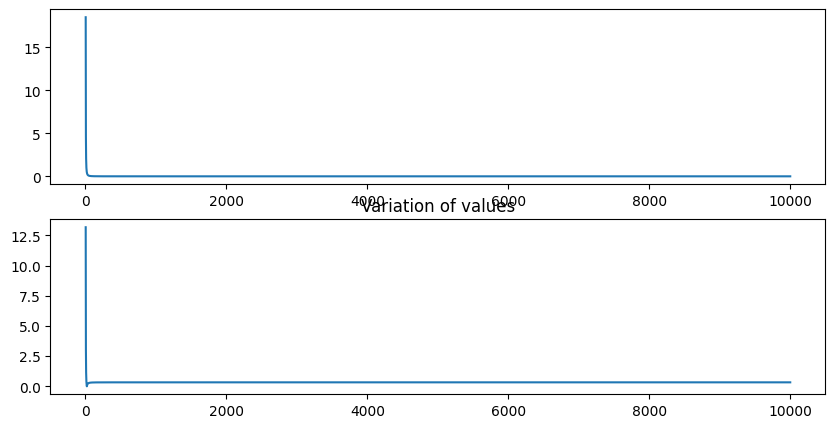

In [82]:
import numpy as np
a,b,n=0,10,10000
x=np.linspace(a,b,int(n))
def f(x):
    return(x*x)
val=np.trapz(f(x),x,(b-a)/n)
x=[]
y1=[]
y2=[]
for i in range(3,int(n)):
    x.append(i)
    v=cy_trapz(cf_1,0,10,i)
    y1.append(abs(v-val))
    v=py_trapz(f,1,10,i)
    y2.append(abs(v-val))

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,figsize = (10, 5))
plt.title('Variation of values')
ax1.plot(x,y1)
ax2.plot(x,y2)